In [ ]:
import pandas as pd

In [ ]:
cpu_df = pd.read_csv('raw_data/cpu.csv')
motherboard_df = pd.read_csv('raw_data/motherboard.csv')
ram_df = pd.read_csv('raw_data/ram.csv')
gpu_df = pd.read_csv('raw_data/gpu.csv')
psu_df = pd.read_csv('raw_data/psu.csv')


FOR CPU

In [ ]:
# Check unique values or first 20 rows
print(cpu_df['TDP'].unique()[:20])

# see which are non-numeric
print(cpu_df[~cpu_df['TDP'].apply(lambda x: str(x).replace('.','',1).isdigit())])

In [ ]:
# Extract digits only
cpu_df['TDP'] = cpu_df['TDP'].astype(str).str.extract(r'(\d+)')[0]

# Convert to numeric
cpu_df['TDP'] = pd.to_numeric(cpu_df['TDP'], errors='coerce')

# Drop rows where conversion failed (NaN)
cpu_df = cpu_df.dropna(subset=['TDP'])

# Bin TDP
bins_cpu_tdp = [0, 65, 95, 125, 250]
labels_cpu_tdp = ['<=65W','66-95W','96-125W','>125W']
cpu_df['TDP_Bin'] = pd.cut(cpu_df['TDP'], bins=bins_cpu_tdp, labels=labels_cpu_tdp)

# Keep only needed columns
cpu_df = cpu_df[['Name','Producer','Socket','TDP_Bin']]

# Check the cleaned CPU dataframe
cpu_df.head()


FOR GPU

In [ ]:
# Check unique values or first 20 rows
print(gpu_df['TDP'].unique()[:20])

# see which are non-numeric
print(gpu_df[~gpu_df['TDP'].apply(lambda x: str(x).replace('.','',1).isdigit())])

In [ ]:
gpu_df = gpu_df[['Name','Producer','Vram','TDP']]
# Drop rows with missing essential values
gpu_df.dropna(subset=['Vram','TDP'], inplace=True)

In [ ]:
# Extract digits and convert to numeric
gpu_df['Vram'] = pd.to_numeric(gpu_df['Vram'].astype(str).str.extract(r'(\d+)')[0], errors='coerce')
gpu_df['TDP'] = pd.to_numeric(gpu_df['TDP'].astype(str).str.extract(r'(\d+)')[0], errors='coerce')

# Drop rows that failed conversion
gpu_df = gpu_df.dropna(subset=['Vram','TDP'])


In [ ]:
# Bin VRAM
bins_vram = [0, 4, 6, 8, 12, 24]
labels_vram = ['4GB','6GB','8GB','12GB','24GB+']
gpu_df['Vram_Bin'] = pd.cut(gpu_df['Vram'], bins=bins_vram, labels=labels_vram)

# Bin TDP
bins_gpu_tdp = [0, 150, 250, 350, 500]
labels_gpu_tdp = ['<=150W','151-250W','251-350W','>350W']
gpu_df['TDP_Bin'] = pd.cut(gpu_df['TDP'], bins=bins_gpu_tdp, labels=labels_gpu_tdp)

# Keep only the columns we need
gpu_df = gpu_df[['Name','Producer','Vram_Bin','TDP_Bin']]


In [ ]:
# Check the cleaned GPU dataframe
gpu_df.head()

FOR MOTHERBOARD

In [ ]:
# Check unique values or first 20 rows
print(motherboard_df['Chipset'].unique()[:20])

In [ ]:
motherboard_df = motherboard_df[['Name','Producer','Socket','Chipset','Memory Type']]
# Drop rows with missing essential values
motherboard_df.dropna(subset=['Socket','Chipset','Memory Type'], inplace=True)

In [ ]:
# Standardize Memory Type entries
motherboard_df['Memory Type'] = motherboard_df['Memory Type'].str.upper().str.extract(r'(DDR4|DDR5)')[0]


In [ ]:
# Remove DDR3 and keep only DDR4 and DDR5 for modern compatibility
motherboard_df = motherboard_df[motherboard_df['Memory Type'].isin(['DDR4','DDR5'])]

In [ ]:
motherboard_df.head()


FOR RAM

In [ ]:
# Check unique values or first 20 rows
print(ram_df['Ram Type'].unique()[:20])

In [ ]:
ram_df = ram_df[['Name','Producer','Ram Type','Size']]
# Drop rows with missing essential values
ram_df.dropna(subset=['Ram Type','Size'], inplace=True)

In [ ]:
# Extract DDR type (DDR4 or DDR5)
ram_df['Ram Type'] = ram_df['Ram Type'].str.upper().str.extract(r'(DDR4|DDR5)')[0]

# Remove rows that are not DDR4 or DDR5
ram_df = ram_df[ram_df['Ram Type'].isin(['DDR4','DDR5'])]

In [ ]:
# Extract digits from Size (in GB)
ram_df['Size'] = pd.to_numeric(ram_df['Size'].astype(str).str.extract(r'(\d+)')[0], errors='coerce')

# Drop rows where conversion failed
ram_df = ram_df.dropna(subset=['Size'])

# Bin RAM size
bins_size = [0, 4, 8, 16, 32, 64, 128]
labels_size = ['4GB','8GB','16GB','32GB','64GB','128GB+']
ram_df['Size_Bin'] = pd.cut(ram_df['Size'], bins=bins_size, labels=labels_size)

# Keep only necessary columns
ram_df = ram_df[['Name','Producer','Ram Type','Size_Bin']]


In [ ]:
ram_df.head()


FOR PSU

In [ ]:
# Check unique values or first 20 rows
print(psu_df['Watt'].unique()[:20])

# see which are non-numeric
print(psu_df[~psu_df['Watt'].apply(lambda x: str(x).replace('.','',1).isdigit())])

In [ ]:
psu_df = psu_df[['Name','Producer','Watt']]
# Drop rows with missing Watt
psu_df.dropna(subset=['Watt'], inplace=True)

In [ ]:
# Extract digits and convert to numeric
psu_df['Watt'] = pd.to_numeric(psu_df['Watt'].astype(str).str.extract(r'(\d+)')[0], errors='coerce')

# Drop rows that failed conversion
psu_df = psu_df.dropna(subset=['Watt'])


In [ ]:
# Bin Watt
bins_psu = [0, 450, 600, 750, 900, 1200]
labels_psu = ['<=450W','451-600W','601-750W','751-900W','901-1200W']
psu_df['Watt_Bin'] = pd.cut(psu_df['Watt'], bins=bins_psu, labels=labels_psu)

# Keep only necessary columns
psu_df = psu_df[['Name','Producer','Watt_Bin']]

In [ ]:
psu_df.head()

In [ ]:
cpu_df.to_csv('cleaned/cpu_cleaned.csv', index=False)
gpu_df.to_csv('cleaned/gpu_cleaned.csv', index=False)
motherboard_df.to_csv('cleaned/motherboard_cleaned.csv', index=False)
ram_df.to_csv('cleaned/ram_cleaned.csv', index=False)
psu_df.to_csv('cleaned/psu_cleaned.csv', index=False)


Merge cleaned datasets into transactions

In [ ]:
cpu_items = cpu_df.reset_index(drop=True)
mb_items = motherboard_df.reset_index(drop=True)
ram_items = ram_df.reset_index(drop=True)
gpu_items = gpu_df.reset_index(drop=True)
psu_items = psu_df.reset_index(drop=True)

In [ ]:
import random

transactions = []
target_size = 600  # manageable number

cpu_df = cpu_df.reset_index(drop=True)
motherboard_df = motherboard_df.reset_index(drop=True)
ram_df = ram_df.reset_index(drop=True)
gpu_df = gpu_df.reset_index(drop=True)
psu_df = psu_df.reset_index(drop=True)

while len(transactions) < target_size:
    # CPU
    cpu = cpu_df.sample(n=1).iloc[0]
    
    # Compatible motherboard
    mb_compatible = motherboard_df[motherboard_df['Socket'] == cpu['Socket']]
    if mb_compatible.empty:
        continue
    mb = mb_compatible.sample(n=1).iloc[0]
    
    # Compatible RAM
    ram_compatible = ram_df[ram_df['Ram Type'] == mb['Memory Type']]
    if ram_compatible.empty:
        continue
    ram = ram_compatible.sample(n=1).iloc[0]
    
    # GPU & PSU
    gpu = gpu_df.sample(n=1).iloc[0]
    psu = psu_df.sample(n=1).iloc[0]
    
    # Combine attributes as items
    transaction = [
        f"CPU_Producer:{cpu['Producer']}", f"CPU_Socket:{cpu['Socket']}", f"CPU_TDP:{cpu['TDP_Bin']}",
        f"MB_Producer:{mb['Producer']}", f"MB_Socket:{mb['Socket']}", f"MB_Chipset:{mb['Chipset']}", f"MB_Memory:{mb['Memory Type']}",
        f"RAM_Producer:{ram['Producer']}", f"RAM_Type:{ram['Ram Type']}", f"RAM_Size:{ram['Size_Bin']}",
        f"GPU_Producer:{gpu['Producer']}", f"GPU_VRAM:{gpu['Vram_Bin']}", f"GPU_TDP:{gpu['TDP_Bin']}",
        f"PSU_Producer:{psu['Producer']}", f"PSU_Watt:{psu['Watt_Bin']}"
    ]
    transactions.append(transaction)

print("Generated transactions:", len(transactions))
print("Example transaction:", transactions[0])

In [ ]:
import csv

with open('processed_data.csv', 'w', newline='') as f:
    writer = csv.writer(f)
    for t in transactions:
        writer.writerow(t)

One-hot encode transactions

In [1]:
import pandas as pd
import csv

transactions = []
with open('processed_data.csv', newline='') as f:
    reader = csv.reader(f)
    for row in reader:
        transactions.append(row)

print("Total transactions loaded:", len(transactions))

Total transactions loaded: 600


In [ ]:
from mlxtend.preprocessing import TransactionEncoder

te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df_encoded = pd.DataFrame(te_ary, columns=te.columns_)

print("Encoded matrix shape:", df_encoded.shape)


In [ ]:
# Total transactions and unique items
total_transactions = df_encoded.shape[0]
unique_items = df_encoded.shape[1]

print("Total transactions:", total_transactions)
print("Unique items:", unique_items)


In [ ]:
# Compute item support
item_support = df_encoded.mean()

# Keep items with support > 0.01
top_items = item_support[item_support > 0.01].index
df_filtered = df_encoded[top_items]

print(f"Filtered to top {len(top_items)} items (support > 0.01)")


In [ ]:
# Compute density
matrix_size = df_filtered.shape
density = df_filtered.sum().sum() / (matrix_size[0] * matrix_size[1]) * 100

print("Matrix size:", matrix_size[0], "transactions ×", matrix_size[1], "items")
print(f"Density: {density:.2f}%")


In [3]:
import pandas as pd

# Load CSV
transactions = []
with open('processed_data.csv', 'r') as f:
    for line in f:
        # Split each row by comma to get individual items
        transactions.append(line.strip().split(','))

print("Total transactions:", len(transactions))
print("Sample transaction:", transactions[0])


Total transactions: 600
Sample transaction: ['CPU_Producer:Intel', 'CPU_Socket:1200', 'CPU_TDP:96-125W', 'MB_Producer:ASUS', 'MB_Socket:1200', 'MB_Chipset:Z590', 'MB_Memory:DDR4', 'RAM_Producer:Crucial', 'RAM_Type:DDR4', 'RAM_Size:16GB', 'GPU_Producer:EVGA', 'GPU_VRAM:8GB', 'GPU_TDP:151-250W', 'PSU_Producer:Xilence', 'PSU_Watt:451-600W']


In [4]:
from collections import Counter

# Flatten list of all items
all_items = [item for transaction in transactions for item in transaction]

# Count frequency of each item
item_counts = Counter(all_items)

# Convert to DataFrame for plotting
item_df = pd.DataFrame(item_counts.items(), columns=['Item','Frequency'])
item_df = item_df.sort_values('Frequency', ascending=False).reset_index(drop=True)

# Preview top items
item_df.head(10)


,Item,Frequency
0,MB_Memory:DDR4,548
1,RAM_Type:DDR4,548
2,CPU_Producer:Intel,371
3,CPU_TDP:<=65W,295
4,GPU_TDP:151-250W,258
5,RAM_Producer:G.Skill,238
6,CPU_Producer:AMD,229
7,GPU_VRAM:8GB,226
8,RAM_Size:16GB,219
9,MB_Producer:ASUS,200


C:\Users\Aeonalyx\AppData\Local\Temp\ipykernel_3332\3414110074.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frequency', y='Item', data=item_df.head(20), palette='viridis')


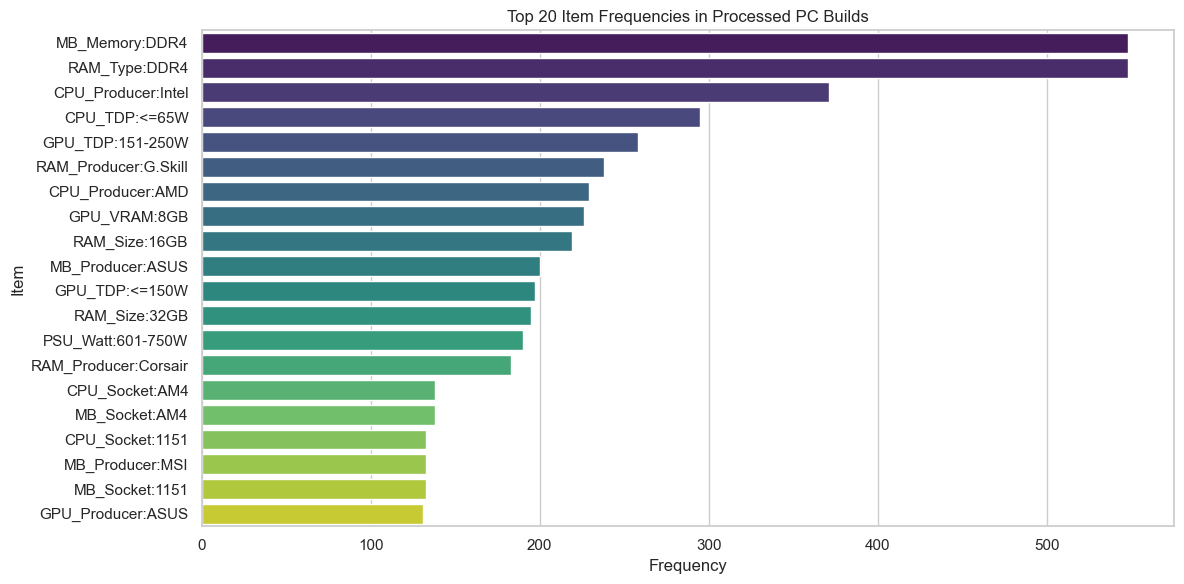

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set(style="whitegrid")

# Plot top 20 items
plt.figure(figsize=(12,6))
sns.barplot(x='Frequency', y='Item', data=item_df.head(20), palette='viridis')
plt.title('Top 20 Item Frequencies in Processed PC Builds')
plt.xlabel('Frequency')
plt.ylabel('Item')
plt.tight_layout()
plt.show()
